# Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The Data
Let's start to read CSV file of our dateset into a pandas dataframe.

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [9]:
iris.isnull().values.any()

False

In [11]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [14]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# visualization of the data to see relationship between data !

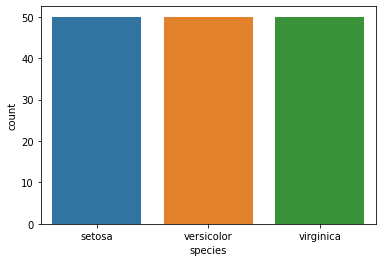

In [13]:
sns.countplot(iris['species'])

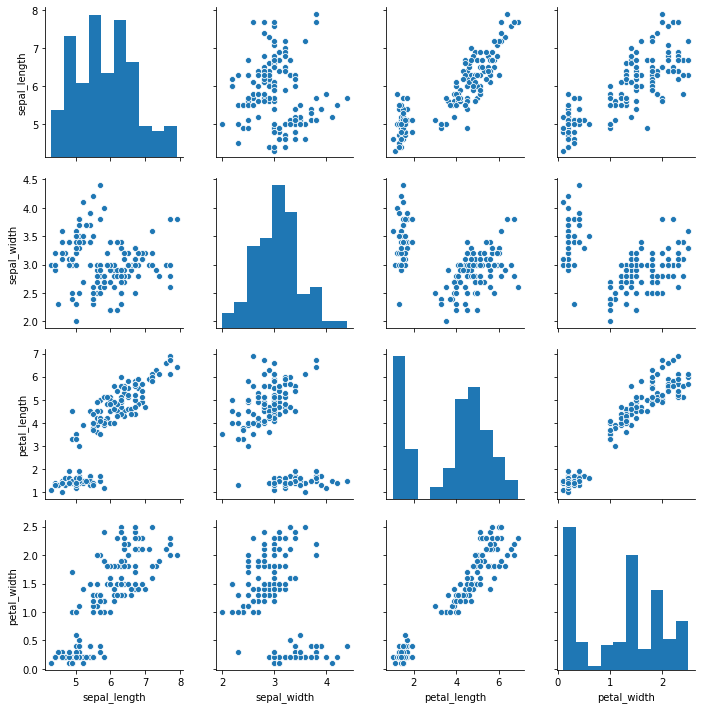

In [20]:
sns.pairplot(iris)

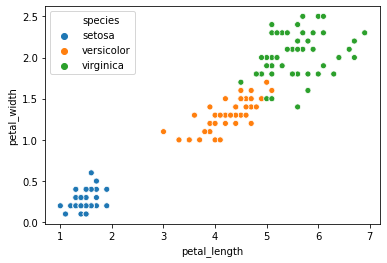

In [22]:
sns.scatterplot(x=iris['petal_length'],y=iris['petal_width'],hue=iris['species'])

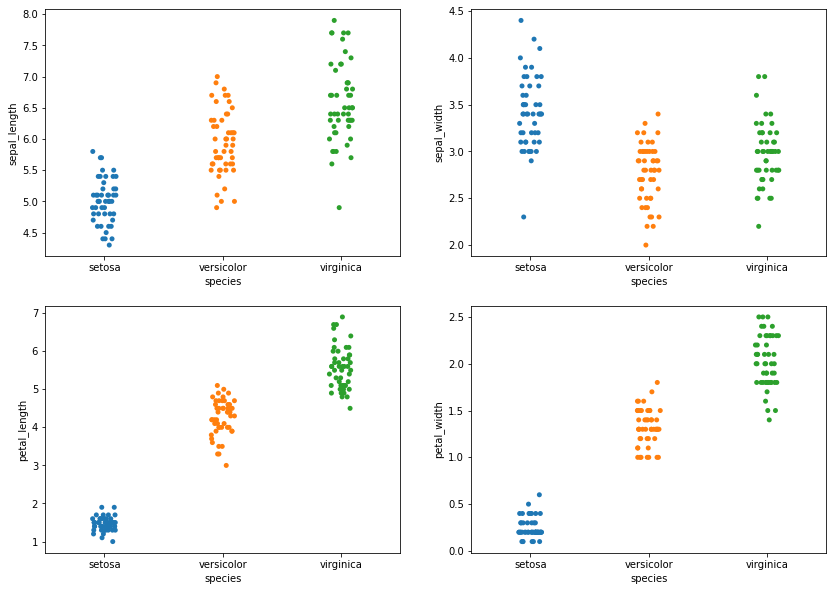

In [23]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.stripplot(x=iris['species'],y=iris['sepal_length'])
plt.subplot(2,2,2)
sns.stripplot(x=iris['species'],y=iris['sepal_width'])
plt.subplot(2,2,3)
sns.stripplot(x=iris['species'],y=iris['petal_length'])
plt.subplot(2,2,4)
sns.stripplot(x=iris['species'],y=iris['petal_width'])

# Building a  -  model

## Train Test Split

In [25]:
# spliting data for Training and Testing where 'x' training data and 'y' is testing data
x =iris.iloc[ : , :4]
y =iris['species']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=3)

## Training and Predicting

In [27]:
from sklearn import svm

In [28]:
model=svm.SVC(kernel='rbf',C=1.0) 

In [29]:
model.fit(x,y)

C:\Users\rushi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
model.score(x_test,y_test)

1.0

In [31]:
sl=float(input("Enter sepal length : "))
sw=float(input("Enter sepal width : "))
pl=float(input("Enter prtal length : "))
pw=float(input("Enter petal width : "))

x=model.predict([[sl,sw,pl,pw]])
print("According to data flower specie is :",x)

Enter sepal length : 2.6
Enter sepal width : 5.6
Enter prtal length : 2.6
Enter petal width : 9.4
According to data flower specie is : ['virginica']
